In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_and_visualize_hourly_data(header_lines, file_path, output_value_name):
    """
    Process hourly data, calculate daily averages, and create visualizations.
    
    Parameters:
    header_lines (int): The number of header lines to skip
    file_path (str): The path of the data file
    output_value_name (str): The name of the value column in the output DataFrame
    
    Returns:
    pd.DataFrame: Processed daily average DataFrame
    """
    
    # Process the data
    def process_hourly_data(header_lines, file_path, output_value_name):
        df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')
        
        if 'value' in df.columns:
            df_cleaned = df[df['value'] != -999.99]
        else:
            df.columns = ['year', 'month', 'day', 'hour', 'minute', 'value', 'std']
            df = df.drop(columns=['minute', 'std'])
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            df_cleaned = df[~df['value'].isna()]
        
        daily_avg = (
            df_cleaned.groupby(['year', 'month', 'day'])['value']
            .mean()
            .round(3)
            .reset_index()
            .rename(columns={'value': output_value_name}) 
        )
        
        return daily_avg
    
    # Process the data
    result = process_hourly_data(header_lines, file_path, output_value_name)
    # print(result)
    
    # Create datetime index
    result['date'] = pd.to_datetime(result[['year', 'month', 'day']])
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)
    
    return result


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_5561/524663225.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')


过滤前数据量: 121714
过滤后数据量: 121713
过滤掉的数据量: -29257


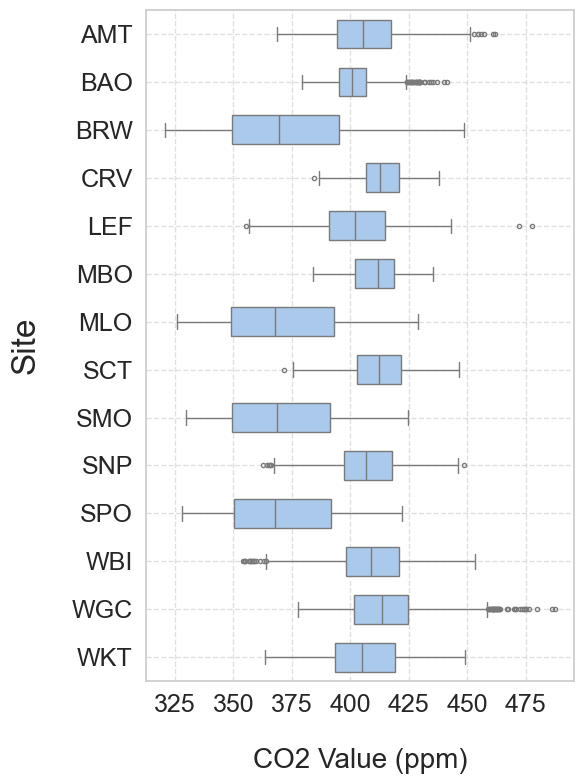

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_boxplot(sites_data, max_threshold=800):

    all_data = []
    
    for site_name, df in sites_data.items():
        matching_cols = [col for col in df.columns if col.lower() == site_name.lower()]
        
        if not matching_cols:
            raise ValueError(f"in{site_name}not found")
            
        value_col = matching_cols[0] 
        
        temp_df = df[[value_col]].copy()
        temp_df['Site'] = site_name
        temp_df = temp_df.rename(columns={value_col: 'Value'})
        all_data.append(temp_df)
    
    combined_df = pd.concat(all_data)
    
    plt.figure(figsize=(6, 8))
    sns.set(style="whitegrid", palette="pastel")

    combined_df = combined_df[combined_df['Value'] <= max_threshold]
    
    boxplot = sns.boxplot(
        y='Site', 
        x='Value', 
        data=combined_df,
        width=0.6,
        linewidth=1.0,
        fliersize=3,
        # showmeans=True,
        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
    )

    plt.xlabel('CO2 Value (ppm)', fontsize=20, labelpad=22) 
    plt.ylabel('Site', fontsize=24, labelpad=22)
    plt.xticks(fontsize=18) 
    plt.yticks(fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
    
    return combined_df

sites_data = {
    'AMT' : process_and_visualize_hourly_data(161, 'co2_amt_tower-insitu_1_ccgg_HourlyData.txt', 'amt'),
    'BAO' : process_and_visualize_hourly_data(165, 'co2_bao_tower-insitu_1_ccgg_HourlyData.txt', 'bao'),
    'BRW' : process_and_visualize_hourly_data(164, 'co2_brw_surface-insitu_1_ccgg_HourlyData.txt', 'brw'),
    'CRV' : process_and_visualize_hourly_data(196, 'co2_crv_tower-insitu_1_ccgg_HourlyData.txt', 'crv'),
    'LEF' : process_and_visualize_hourly_data(188, 'co2_lef_tower-insitu_1_ccgg_HourlyData.txt', 'lef'),
    'MBO' : process_and_visualize_hourly_data(160, 'co2_mbo_surface-insitu_1_ccgg_HourlyData.txt', 'mbo'),
    'MLO' : process_and_visualize_hourly_data(165, 'co2_mlo_surface-insitu_1_ccgg_HourlyData.txt', 'mlo'),
    'SCT' : process_and_visualize_hourly_data(168, 'co2_sct_tower-insitu_1_ccgg_HourlyData.txt', 'sct'),
    'SMO' : process_and_visualize_hourly_data(164, 'co2_smo_surface-insitu_1_ccgg_HourlyData.txt', 'smo'),
    'SNP' : process_and_visualize_hourly_data(167, 'co2_snp_surface-insitu_1_ccgg_HourlyData.txt', 'snp'),
    'SPO' : process_and_visualize_hourly_data(164, 'co2_spo_surface-insitu_1_ccgg_HourlyData.txt', 'spo'),
    'WBI' : process_and_visualize_hourly_data(162, 'co2_wbi_tower-insitu_1_ccgg_HourlyData.txt', 'wbi'),
    'WGC' : process_and_visualize_hourly_data(204, 'co2_wgc_tower-insitu_1_ccgg_HourlyData.txt', 'wgc'),
    'WKT' : process_and_visualize_hourly_data(156, 'co2_wkt_tower-insitu_1_ccgg_HourlyData.txt', 'wkt')
}

combined_data = plot_combined_boxplot(sites_data, max_threshold=800)




In [3]:
combined_data

,Value,Site
date,,
2003-09-19,392.021,AMT
2003-09-20,376.130,AMT
2003-09-21,385.192,AMT
2003-09-22,389.921,AMT
2003-09-23,382.608,AMT
...,...,...
2024-05-27,432.951,WKT
2024-05-28,433.665,WKT
2024-05-29,430.269,WKT


In [4]:

pivot_dfs = []

for site_name, df in sites_data.items():
    value_col = [col for col in df.columns if col.lower() == site_name.lower()][0]
    
    site_series = df[value_col].rename(site_name)
    pivot_dfs.append(site_series)

corr_df = pd.concat(pivot_dfs, axis=1)

print(corr_df.head())

宽表数据样例：
            AMT  BAO      BRW  CRV  LEF  MBO  MLO  SCT  SMO  SNP  SPO  WBI  \
date                                                                         
1973-07-24  NaN  NaN  325.555  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-25  NaN  NaN  325.453  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-26  NaN  NaN  326.150  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-27  NaN  NaN  325.434  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-28  NaN  NaN  324.445  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            WGC  WKT  
date                  
1973-07-24  NaN  NaN  
1973-07-25  NaN  NaN  
1973-07-26  NaN  NaN  
1973-07-27  NaN  NaN  
1973-07-28  NaN  NaN  


In [5]:

corr_matrix = corr_df.corr()

print("\nThe 5 pairs of sites with the highest correlation:")
corr_stack = corr_matrix.stack()
corr_stack = corr_stack[corr_stack < 1.0]
print(corr_stack.sort_values(ascending=False).head(5))


相关性最高的5对站点：
SMO  MLO    0.995926
MLO  SMO    0.995926
SMO  SPO    0.986755
SPO  SMO    0.986755
BRW  MLO    0.984947
dtype: float64


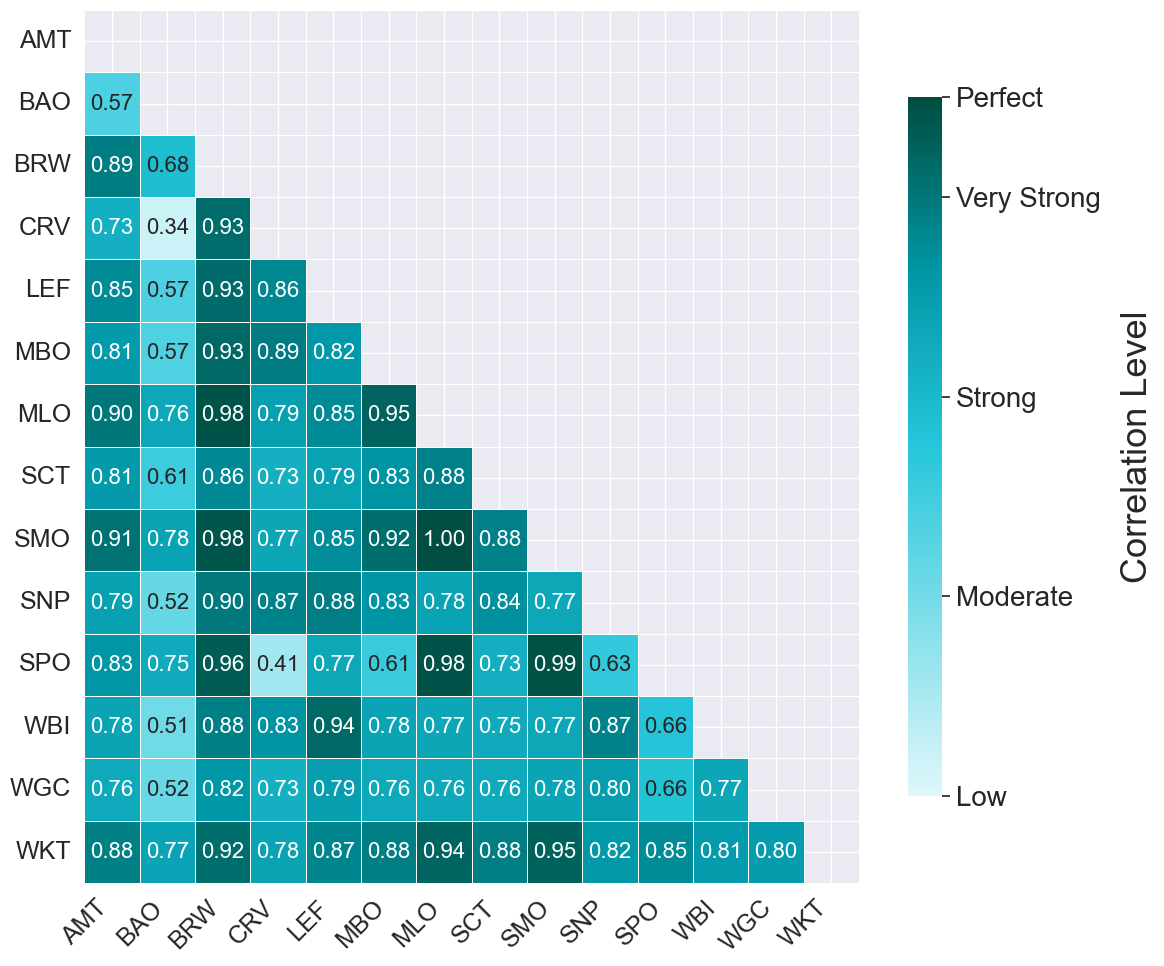

In [6]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.5)

cmap = LinearSegmentedColormap.from_list(
    "strong_blue_green",
    ["#e0f7fa", "#80deea", "#26c6da", "#0097a7", "#004d40"]
)

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"},
    annot_kws={"size": 16},
    vmin=0.3,
    vmax=1
)

# plt.title("CO₂ Concentration Correlation (0.3 to 1 Scale)", fontsize=22, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([0.3, 0.5, 0.7, 0.9, 1.0])
cbar.set_ticklabels(["Low", "Moderate", "Strong", "Very Strong", "Perfect"])
cbar.ax.tick_params(labelsize=20)
cbar.set_label("Correlation Level", fontsize=26, labelpad=15)

plt.tight_layout()
plt.show()





In [7]:
def iqr_outlier_processing(df, multiplier=1.0):
    processed_df = df.copy()
    outlier_stats = {}
    
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        
        is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = is_outlier.sum()
        processed_df[column] = df[column].mask(is_outlier).interpolate()
        
        outlier_stats[column] = {
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2),
            'outliers': outlier_count,
            'percentage': round(outlier_count / len(df) * 100, 2)
        }
    
    return processed_df, outlier_stats

In [8]:
# corr_df, stats = iqr_outlier_processing(corr_df)

# print("{:<5} {:<10} {:<10} {:<10} {:<10}".format(
#     "Site", "Lower", "Upper", "Outliers", "Percent%"))
# for site, data in stats.items():
#     print("{:<5} {:<10.2f} {:<10.2f} {:<10} {:<10.2f}%".format(
#         site, data['lower_bound'], data['upper_bound'], 
#         data['outliers'], data['percentage']))



Site  Lower      Upper      Outliers   Percent%  
AMT   371.47     440.29     60         0.32      %
BAO   383.46     418.29     89         0.47      %
BRW   303.31     441.39     1          0.01      %
CRV   392.62     434.75     35         0.19      %
LEF   367.48     438.27     48         0.26      %
MBO   385.88     434.83     5          0.03      %
MLO   304.55     437.42     0          0.00      %
SCT   383.82     440.86     49         0.26      %
SMO   307.39     433.34     0          0.00      %
SNP   376.69     438.28     100        0.53      %
SPO   308.61     433.01     1          0.01      %
WBI   375.19     443.83     129        0.69      %
WGC   379.04     447.21     145        0.77      %
WKT   367.90     444.80     7          0.04      %


In [12]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_lstm(input_length, n_features):
    model = Sequential([
        LSTM(64, input_shape=(input_length, n_features)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def build_gru(input_length, n_features):
    model = Sequential([
        GRU(64, input_shape=(input_length, n_features)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def build_mlp(input_length, n_features):
    model = Sequential([
        Flatten(input_shape=(input_length, n_features)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

model_builders = {
    'LSTM': build_lstm,
    'GRU': build_gru,
    'MLP': build_mlp
}

def create_sequences(data, input_len):
    X, y = [], []
    for i in range(len(data) - input_len):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len])
    return np.array(X), np.array(y)

input_length = 30
ratios = [0.2, 0.4, 0.6, 0.8]
n_features = 1

all_results = []

for station in tqdm(corr_df.columns, desc="Running for all stations"):
    series = corr_df[station].dropna().reset_index(drop=True)
    if len(series) < input_length + 50:
        continue  

    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()

    total_len = len(scaled_values)
    val_len = int(total_len * 0.2)
    train_total_len = total_len - val_len

    val_data = scaled_values[-val_len:]
    X_val, y_val = create_sequences(val_data, input_length)

    rolling_data = []
    for ratio in ratios:
        train_len = int(train_total_len * ratio)
        train_data = scaled_values[:train_len]
        X_train, y_train = create_sequences(train_data, input_length)

        rolling_data.append({
            'ratio': ratio,
            'X_train': X_train,
            'y_train': y_train,
            'X_val': X_val,
            'y_val': y_val
        })

    for model_name, builder in model_builders.items():
        for i, data in enumerate(rolling_data):
            mse_ppm_list = []

            for run in range(10): 
                X_train = data['X_train'].reshape(-1, input_length, n_features)
                y_train = data['y_train']
                X_val = data['X_val'].reshape(-1, input_length, n_features)
                y_val = data['y_val']

                model = builder(input_length, n_features)
                model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
                early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

                model.fit(
                    X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    verbose=0,
                    callbacks=[early_stop]
                )

                y_pred = model.predict(X_val, verbose=0)
                y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
                y_pred_inv = scaler.inverse_transform(y_pred).flatten()
                mse_inv = mean_squared_error(y_val_inv, y_pred_inv)
                mse_ppm_list.append(mse_inv)

            all_results.append({
                'Station': station,
                'Model': model_name,
                'Train_Ratio': int(data['ratio'] * 100),
                'MSE_ppm_mean': np.mean(mse_ppm_list),
                'MSE_ppm_std': np.std(mse_ppm_list)
            })

# ========== 保存结果 ==========
result_df = pd.DataFrame(all_results)
result_df.to_csv('multi_station_forecast_results_ppm.csv', index=False)


Running for all stations:   0%|                          | 0/14 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/

✅ 所有站点训练完成，结果已保存为 multi_station_forecast_results_ppm.csv


In [27]:
for station in sorted(set([r['Station'] for r in all_results])):
    print(f"\n=== Station: {station} ===")
    station_results = [r for r in all_results if r['Station'] == station]
    for model_name in ['LSTM', 'GRU', 'MLP']:
        print(f"\n--- Model: {model_name} ---")
        for r in sorted([x for x in station_results if x['Model'] == model_name], key=lambda x: x['Train_Ratio']):
            print(f"Train {r['Train_Ratio']}% → MSE (ppm): {r['MSE_ppm_mean']:.2f} ± {r['MSE_ppm_std']:.2f}")



=== Station: AMT ===

--- Model: LSTM ---
Train 20% → MSE (ppm): 32.80 ± 12.15
Train 40% → MSE (ppm): 19.05 ± 3.03
Train 60% → MSE (ppm): 14.24 ± 0.59
Train 80% → MSE (ppm): 13.81 ± 0.19

--- Model: GRU ---
Train 20% → MSE (ppm): 154.95 ± 43.07
Train 40% → MSE (ppm): 26.53 ± 5.34
Train 60% → MSE (ppm): 18.06 ± 3.89
Train 80% → MSE (ppm): 14.03 ± 0.38

--- Model: MLP ---
Train 20% → MSE (ppm): 21.17 ± 6.19
Train 40% → MSE (ppm): 14.14 ± 0.48
Train 60% → MSE (ppm): 13.86 ± 0.20
Train 80% → MSE (ppm): 13.99 ± 0.21

=== Station: BAO ===

--- Model: LSTM ---
Train 20% → MSE (ppm): 0.23 ± 0.31
Train 40% → MSE (ppm): 0.36 ± 0.41
Train 60% → MSE (ppm): 0.01 ± 0.02
Train 80% → MSE (ppm): 0.02 ± 0.04

--- Model: GRU ---
Train 20% → MSE (ppm): 0.68 ± 0.48
Train 40% → MSE (ppm): 1.95 ± 1.00
Train 60% → MSE (ppm): 0.01 ± 0.01
Train 80% → MSE (ppm): 0.00 ± 0.00

--- Model: MLP ---
Train 20% → MSE (ppm): 0.03 ± 0.04
Train 40% → MSE (ppm): 0.03 ± 0.03
Train 60% → MSE (ppm): 0.03 ± 0.06
Train 80% → MS